## Class Activity FFT Signal and Processing
by Arsyadana Estu Aziz (121140068)  

Diberikan sebuah dataset sinyal, lakukan proses analisis FFT dan pengaplikasian Filtering pada Frekuensi Domain. 
Dataset berisi sebuah file csv berisikan beberapa informasi berikut
- Sampling rate = 600 Hz
- Durasi sinyal = 8 detik
- Jumlah sampel = 4800 (Sesuai dengan 600 * 8)

### Task
1. Analisis Sinyal menggunakan FFT

- Muat sinyal yang ditugaskan dari file CSV
- Plot sinyal asli dalam domain waktu (time domain)
- Terapkan FFT untuk menganalisis komponen frekuensi
- Identifikasi dan dokumentasikan frekuensi yang paling dominan
dalam sinyal Anda
- Plot spektrum frekuensi dan tandai frekuensi dominan

## Open file and read the content
Kita bisa menggunakan pandas sebagai media untuk membaca isi csv dan mengambil isi nilai dari sinyal tersebut.

**Notes:** Sebagai catatan, saya tidak tahu apakah nilai sinyal ini sudah di normalisasi atau belum, maka saya akan melakukan normalisasi untuk berjaga-jaga

Signal shape: (4800, 1) | Signal length: 4800


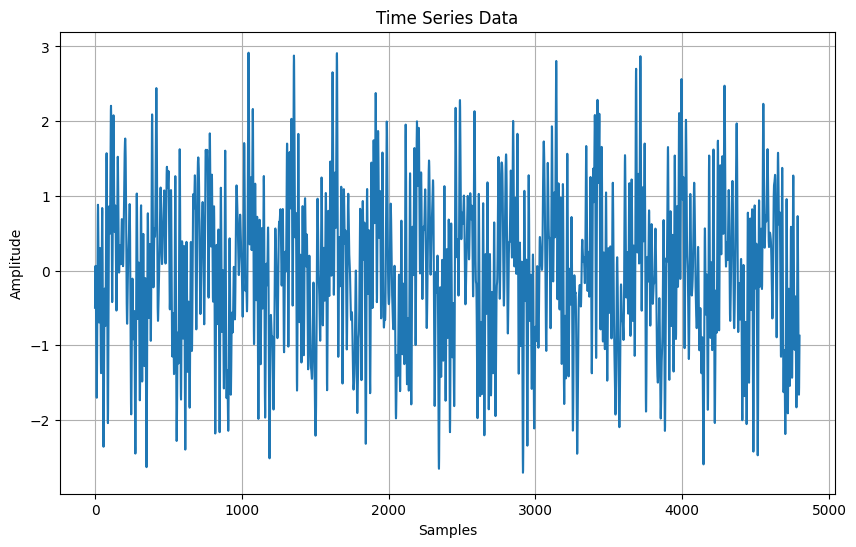

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, filtfilt, freqz

# Load the signal from a CSV file
signal = pd.read_csv('data/121140068_8_600.csv', header=None)

## Print shape, length and head of the signal
print(f"Signal shape: {signal.shape} | Signal length: {len(signal)}")
signal.head()

## Normalize the value
signal = signal.iloc[:, 0].values
signal = (signal - np.mean(signal)) / np.std(signal)

# Define parameters
sampling_rate = 600  # Hz
duration = 8  # seconds

## Visualize the signal 
plt.figure(figsize=(10, 6))
plt.plot(signal)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('Time Series Data')
plt.grid(True)
plt.show()


## Performing the FFT and determine the most dominant frequencies
Karena kita sudah mengambil data sinyal dan melakukan normalisasi, kita dapat mengubah sinyal ini menjadi frekuensi domain. Disini saya menggunakan metode `fft` dari scipy untuk proses fft

The most dominant frequency is 2.00 Hz


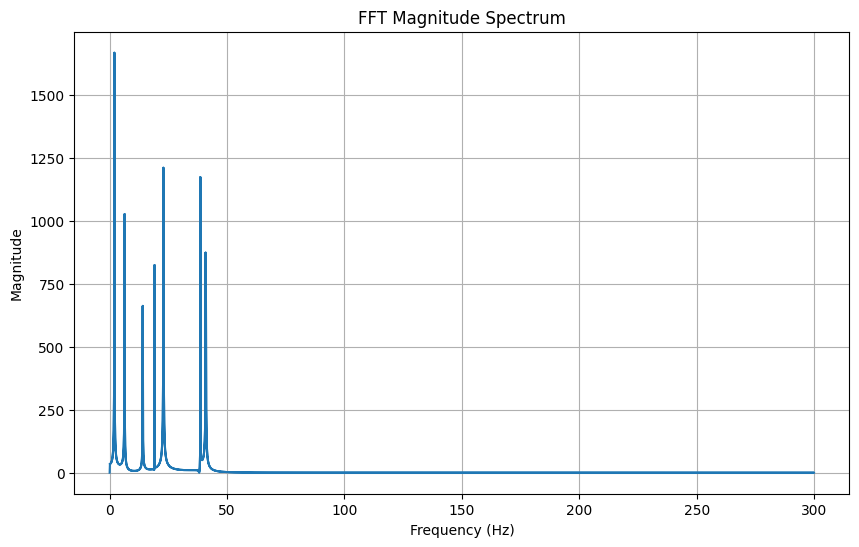

In [28]:
from scipy import fft

# Langkah 1: Hitung Panjang Sinyal
N = len(signal)

# Langkah 2: Hitung FFT Menggunakan Fungsi FFT SciPy
fft_results = fft.fft(signal)
fft_magnitude = np.abs(fft_results)  # Get the magnitude of the FFT
fft_freqs = np.fft.fftfreq(len(signal), 1 / sampling_rate)  # Frequency axis

# Langkah 3: Hitung x-axisnya
freq = fft.fftfreq(N, 1/sampling_rate)

# Menemukan frekuensi dominan
dominant_freq = fft_freqs[np.argmax(fft_magnitude)]
print(f"The most dominant frequency is {dominant_freq:.2f} Hz")

# Plot the FFT magnitude spectrum
plt.figure(figsize=(10, 6))
plt.plot(abs(fft_freqs), fft_magnitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT Magnitude Spectrum')
plt.grid(True)
plt.show()

# # Only take the positive half of the spectrum (FFT is symmetrical) 
# half_n = len(signal) // 2
# fft_magnitude = fft_magnitude[:half_n]
# fft_freqs = fft_freqs[:half_n]

### Task
2. Filtering Sinyal

- Rancang dan implementasikan bandpass filter untuk
mengisolasi frekuensi dominan
- Filter harus mempertahankan frekuensi dominan sambil
meredam frekuensi lainnya
- Plot sinyal asli dan sinyal hasil filtering untuk perbandingan
- Bandingkan spektrum frekuensi sebelum dan sesudah filtering

## Perfomring the IIR Bandpass Filtering with Scipy.butter
Karena kita sudah mendapatkan frekuensi dominan dari sinyal tersebut (2 Hz sebagai sinyal dominan). Kita dapat melakukan proses bandpass filter. Sebelum itu ktia dapat menentukan beberapa parameter terlebih dahulu

### Batas Low-freq dan High-freq 
Kita dapat menentukan batas tersebut dengan mencoba-coba, untuk kasus ini saya mencoba batas bawah di nilai 1.5 Hz dan batas atas di nilai 2.5

## Filter order
Order filter sendiri merupakan _change of rate_ (Laju blocking / passing dari sebuah frekuensi sinyal). Semakin tinggi sebuah filter order, maka akan semakin miring / tinggi laju blocking / passing dari frekuensi sinyal tersebut yang akan mengubah bentuk dari sinyal itu sendiri. Berikut merupakan contoh bagaimana, jika membuat nilai dari order sebesar 4


The most dominant frequency is 2.00 Hz


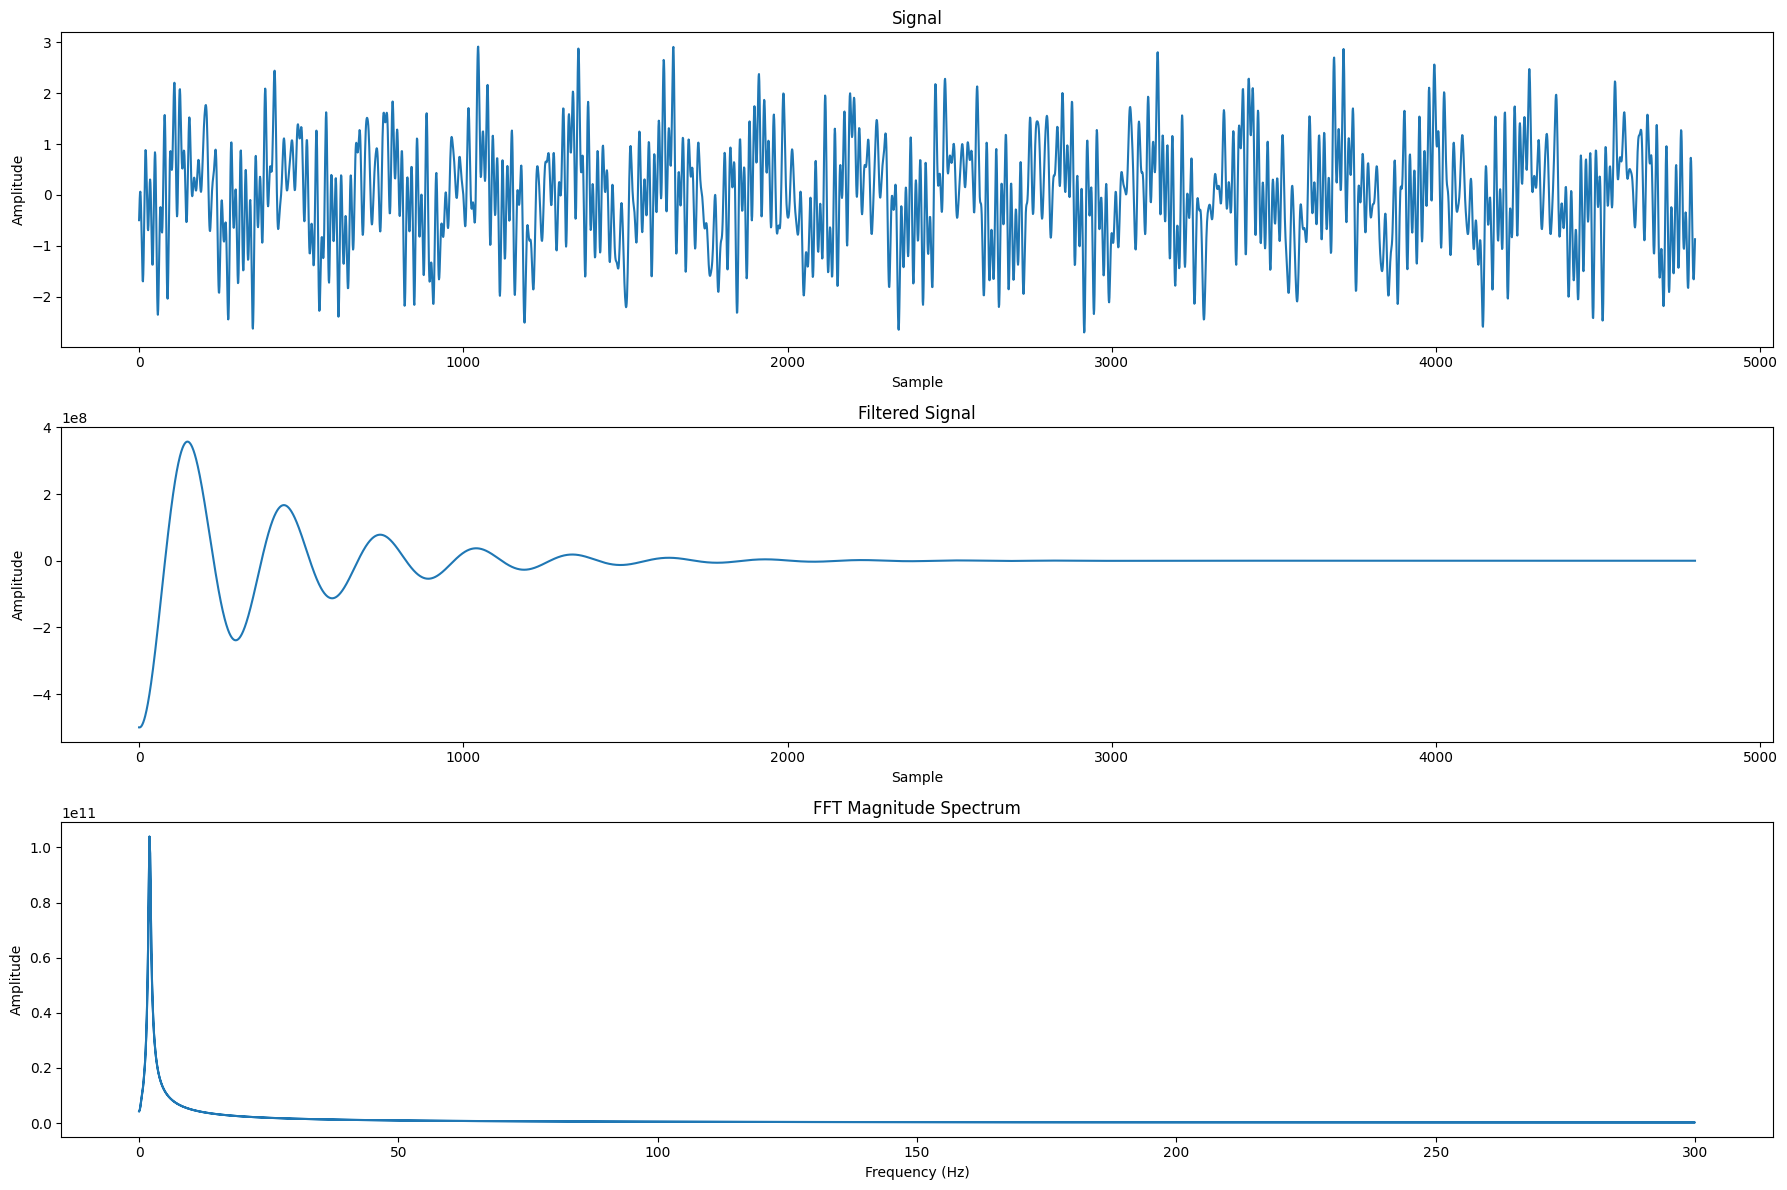

In [29]:
# Define bandpass filter parameters

low_cutoff = 1.5  # Normalized frequency for low cutoff
high_cutoff = 2.5  # Normalized frequency for high cutoff
filter_order = 4

# Design Butterworth bandpass filter
b, a = butter(filter_order, [low_cutoff, high_cutoff], btype='band', fs=sampling_rate)

# Apply the bandpass filter
filtered_signal = filtfilt(b, a, signal)

## Calculating the frequency response of the filter
# Langkah 1: Hitung Panjang Sinyal
N = len(filtered_signal)

# Langkah 2: Hitung FFT Menggunakan Fungsi FFT SciPy
fft_results = fft.fft(filtered_signal)
fft_magnitude = np.abs(fft_results)  # Get the magnitude of the FFT
fft_freqs = np.fft.fftfreq(len(filtered_signal), 1 / sampling_rate)  # Frequency axis

# Langkah 3: Hitung x-axisnya
freq = fft.fftfreq(N, 1/sampling_rate)

# Menemukan frekuensi dominan
dominant_freq = fft_freqs[np.argmax(fft_magnitude)]
print(f"The most dominant frequency is {dominant_freq:.2f} Hz")

fig, ax = plt.subplots(3, 1, figsize=(18, 12))
ax[0].plot(signal)
ax[0].set_title("Signal")
ax[0].set_xlabel("Sample")
ax[0].set_ylabel("Amplitude")

ax[1].plot(filtered_signal)
ax[1].set_title("Filtered Signal")
ax[1].set_xlabel("Sample")
ax[1].set_ylabel("Amplitude")

# Plot the FFT magnitude spectrum
ax[2].plot(abs(fft_freqs), fft_magnitude)
ax[2].set_xlabel('Frequency (Hz)')
ax[2].set_ylabel('Amplitude')
ax[2].set_title('FFT Magnitude Spectrum')

plt.tight_layout()
plt.show()


### Filtering dengan Order 1
Bisa dilihat dengan order yang begitu tinggi, filter secara agresif menghapus sinyal low-freq dan high-freq sehingga menghasilkan sinyal yang begitu halus. Kita bisa ubah dengan filter order 1

## Filtering using IIR with scipy.butter

In [36]:
# Define bandpass filter parameters

## Given the Sampling rate of 600 Hz
nyquist_freq = sampling_rate / 2
low_cutoff = 1.5 / nyquist_freq  # Normalized frequency for low cutoff
high_cutoff = 2.5/ nyquist_freq # Normalized frequency for high cutoff
filter_order = 1

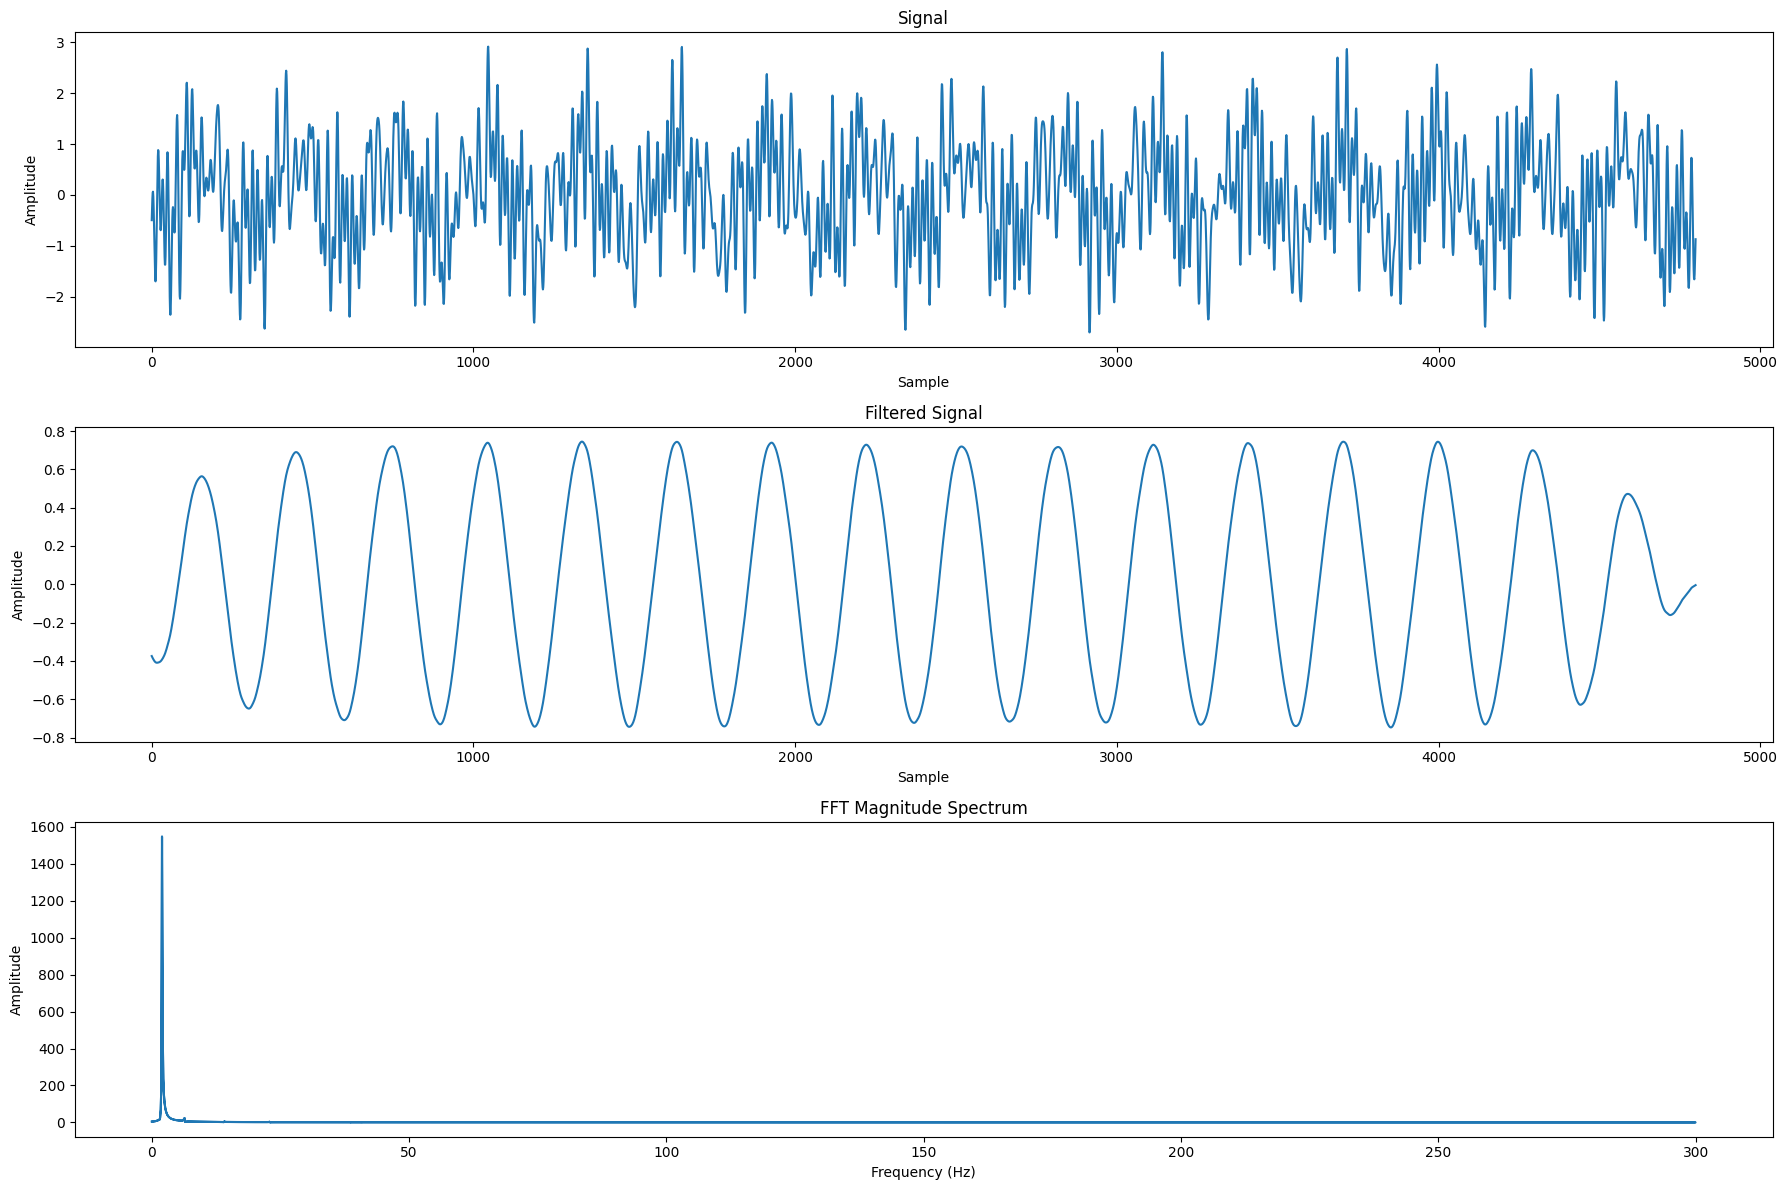

In [37]:
# Design Butterworth bandpass filter
b, a = butter(filter_order, [low_cutoff, high_cutoff], btype='band')

# Apply the bandpass filter
filtered_signal = filtfilt(b, a, signal)

# Langkah 1: Hitung Panjang Sinyal
N = len(filtered_signal)

# Langkah 2: Hitung FFT Menggunakan Fungsi FFT SciPy
fft_results = fft.fft(filtered_signal)
fft_magnitude = np.abs(fft_results)  # Get the magnitude of the FFT
fft_freqs = np.fft.fftfreq(len(filtered_signal), 1 / sampling_rate)  # Frequency axis

# Langkah 3: Hitung x-axisnya
freq = fft.fftfreq(N, 1/sampling_rate)

fig, ax = plt.subplots(3, 1, figsize=(18, 12))
ax[0].plot(signal)
ax[0].set_title("Signal")
ax[0].set_xlabel("Sample")
ax[0].set_ylabel("Amplitude")

ax[1].plot(filtered_signal)
ax[1].set_title("Filtered Signal")
ax[1].set_xlabel("Sample")
ax[1].set_ylabel("Amplitude")

# Plot the FFT magnitude spectrum
ax[2].plot(abs(fft_freqs), fft_magnitude)
ax[2].set_xlabel('Frequency (Hz)')
ax[2].set_ylabel('Amplitude')
ax[2].set_title('FFT Magnitude Spectrum')

plt.tight_layout()
plt.show()



## Analisis and Conclussion
Berdasarkan Class Activity ini, dapat disimpulkan bahwa kita dapat mengubah sinyal dengan FFT untuk melihat frekuensi apa saja yang menysun sebuah sinyal. Dan dari frekuensi teresbut, kita dapat melakukan filter untuk menghapus frekuensi yang tidak penting untuk memperhalus sinyal untuk keperluan pengamatan. Di sisi lain, penting untuk menentukan batas atas dan bawah dari frekuensi dan jenis order dari filter tersebut, untuk menentukan hasil filter yang di inginkan.

## Referensi:
- [LLM - Asistance](https://chatgpt.com/share/67342fe0-3774-800c-bc7e-414a3f19f5b3)
- [Intuition behind sampling rates](https://www.youtube.com/watch?v=Jv5FU8oUWEY&list=WL&index=4&ab_channel=ZachStar)